<h2 align="center">8.1 Bag of words-IMBD  Movie Review Classification<h2>

Task: Classify whether a given movie review is positive or negative.

In [43]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# IMDB Dataset

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

In [2]:
!pip install opendatasets

     ---------------------------------------- 0.0/84.6 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/84.6 kB ? eta -:--:--
     -------------------------------------- - 81.9/84.6 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 84.6/84.6 kB 953.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.8-py3-none-any.whl size=111979 sha256=7c50b2b7759a5399dc578c55fb81303181e03322b5c6b492cfd084138e1e0f45
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\8c\fe\8c\71a8dd0e02634fd0e4ba4abaaf2d4a6049cccff349625331e1
Successfully built kaggle


In [3]:

import opendatasets as od

od.download("https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  ravimb962


Your Kaggle Key:

  ········


100%|█████████████████████████████████████████████████████████████████████████████| 25.7M/25.7M [00:03<00:00, 7.73MB/s]


https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/

In [27]:
file = (r"imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
data = pd.read_csv(file)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [32]:
data.shape

(49582, 2)

In [33]:
data = data.drop_duplicates()

In [34]:
data.shape

(49582, 2)

In [35]:
data.sentiment.value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [36]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [37]:
data["sentiment"] = data.sentiment.replace({"positive":1, "negative":0} )

In [38]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Text(0.5, 1.0, 'Sentiment Distribution')

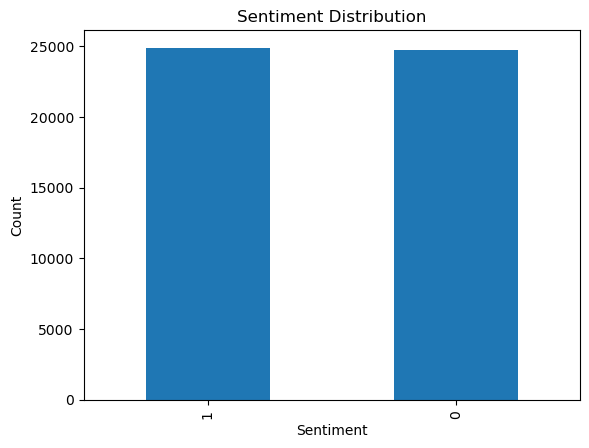

In [44]:
sentiment_counts = data['sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

Looks balkanced dataset

In [45]:
#train test split

X_train, x_test, y_train, y_test = train_test_split(data["review"], data["sentiment"], test_size=0.2)

In [46]:
X_train.head()

13831    Ah, here it is! A movie, which is said by peop...
2899     When I saw the elaborate DVD box for this and ...
8906     Strained and humorless (especially in light of...
40051    as an actor I really like independent films bu...
7342     I saw this movie on my local cable system unde...
Name: review, dtype: object

# Using  Random Forest as the classifier with estimators as 50 and criterion as entropy.

In [48]:
#pipeline

rf_model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("rf", RandomForestClassifier(n_estimators=50, criterion="entropy")) 
     ])

In [49]:
#train model

rf_model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [51]:
#prediction
y_pred = rf_model.predict(x_test)
print("Classification Report Using Random Forest Classifier:\n\n", classification_report(y_test, y_pred))

Classification Report Using Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.83      0.84      0.83      4901
           1       0.84      0.83      0.84      5016

    accuracy                           0.83      9917
   macro avg       0.83      0.83      0.83      9917
weighted avg       0.83      0.83      0.83      9917



# KNN as the classifier with n_neighbors of 10 and metric as 'euclidean'.

In [52]:
#pipeline

knn_model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="euclidean")) 
     ])

In [53]:
#train model

knn_model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [54]:
#prediction
y_pred = knn_model.predict(x_test)
print("Classification Report Using KNN:\n\n", classification_report(y_test, y_pred))

Classification Report Using KNN:

               precision    recall  f1-score   support

           0       0.65      0.65      0.65      4901
           1       0.66      0.66      0.66      5016

    accuracy                           0.66      9917
   macro avg       0.66      0.66      0.66      9917
weighted avg       0.66      0.66      0.66      9917



# Multinomial Naive Bayes as the classifier.

In [55]:
#pipeline

nb_model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB()) 
     ])

In [56]:
#train model

nb_model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [57]:
#prediction
y_pred = nb_model.predict(x_test)
print("Classification Report Using Multinomial Naive Bayes:\n\n", classification_report(y_test, y_pred))

Classification Report Using Multinomial Naive Bayes:

               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4901
           1       0.87      0.82      0.84      5016

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



# Observations

* As Machine learning algorithms does not work on Text data directly, we need to convert them into numeric vector and feed that into models while training.
* In this process, we convert text into a very `high dimensional numeric vector` using the technique of Bag of words.
* Model like K-Nearest Neighbours(KNN) doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of model.
* The easy calculation of probabilities for the words in corpus(Bag of words) and storing them in contigency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.
* As Random Forest uses Bootstrapping(Row and column Sampling) with many decision tree and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifing the categories.
* Machine Learning is like trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which give good results and satisfy the requirements like latency, interpretability etc.

**Articles:**

* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
* https://analyticsindiamag.com/naive-bayes-why-is-it-favoured-for-text-related-tasks/